<a href="https://colab.research.google.com/github/hustlervaibhav/MOVIE-PREDICTION-USING-PYTHON-LANGUAGE-BY-VAIBHAV-/blob/main/MOVIE_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Importnat Libraries

In [ ]:
CODE BY VAIBHAV

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

The datset reading

The dataset reading here will by done first by converting a .dat file into a dataframe and then a dataframe into a .csv file

Firstly for movies.dat input file

In [ ]:
input_file = "movies.dat"
output_file = "output_file.csv"
df_movie = pd.read_csv(input_file, sep ='::', engine ='python', encoding ='latin1',header = None)
df_movie.to_csv(output_file, index=False)
df_movie.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Giving column name and all
df_movie.columns =['MovieIDs', 'MovieName', 'Genre']
df_movie.dropna(inplace=True)
df_movie.head()


,MovieIDs,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#now showing no. of rows nad columns
df_movie.shape

(3883, 3)

In [ ]:
#information abt this dataset
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieIDs   3883 non-null   int64 
 1   MovieName  3883 non-null   object
 2   Genre      3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


Now missing value solution

In [ ]:
df_movie.isnull().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

In [ ]:
no missing value in above dataset so moving to new dataset with the same above processs

rating.dat dataset

In [ ]:
input_file="ratings.dat"
output_file = "output_file.csv"
df_rating=pd.read_csv(input_file, sep ="::", engine='python', encoding='latin1',header=None)
df_rating.to_csv(output_file, index=False)
df_rating.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_rating.columns=['ID','MovieID', 'Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_rating.shape

(1000209, 4)

In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   TimeStamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
#Missing values solution of this dataset
df_rating.isnull().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

user.dat dataset

In [ ]:
input_file="users.dat"
output_file="output_file.csv"
df_user=pd.read_csv(input_file, sep='::', engine='python', encoding='latin1', header=None)
df_user.to_csv(input_file,index=False)
df_user.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
df_user.columns = ['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
df_user.shape

(6040, 5)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
df_user.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

All the 3 datasets togeather

In [ ]:
df=pd.concat([df_movie, df_rating, df_user], axis =1)
df.head()

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieIDs    3883 non-null     float64
 1   MovieName   3883 non-null     object 
 2   Genre       3883 non-null     object 
 3   ID          1000209 non-null  int64  
 4   MovieID     1000209 non-null  int64  
 5   Ratings     1000209 non-null  int64  
 6   TimeStamp   1000209 non-null  int64  
 7   UserID      6040 non-null     float64
 8   Gender      6040 non-null     object 
 9   Age         6040 non-null     float64
 10  Occupation  6040 non-null     float64
 11  Zip-code    6040 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


Now comes the part of data analysis:
In this part we do data analysis using garphs,pie chart etc.

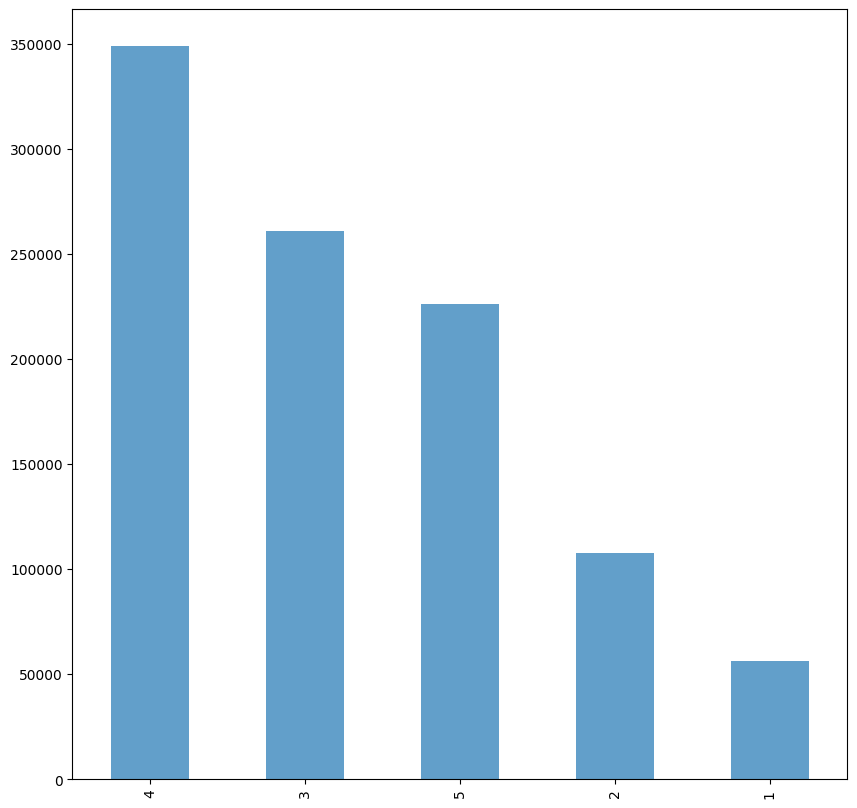

In [ ]:
#rating visuals
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7, figsize = (10,10))
plt.show()

Text(0, 0.5, 'Age')

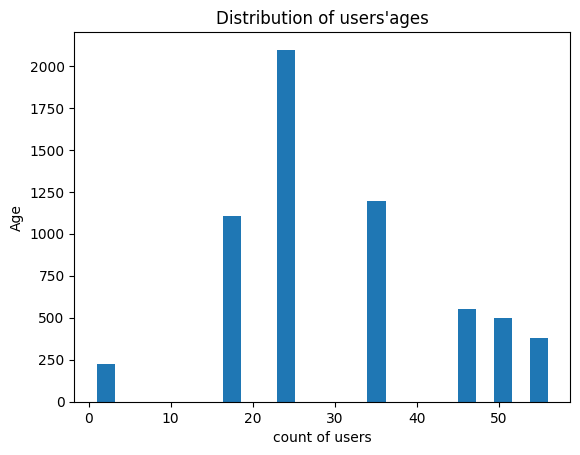

In [ ]:
#now age vs count of users distribution
df.Age.plot.hist(bins=25)
plt.title("Distribution of users'ages")
plt.xlabel('count of users')
plt.ylabel('Age')

In [ ]:
movies=df.groupby('MovieName').size().sort_values(ascending=True)[:1500]
print(movies)

MovieName
$1,000,000 Duck (1971)                                1
Only You (1994)                                       1
Open Season (1996)                                    1
Open Your Eyes (Abre los ojos) (1997)                 1
Operation Condor (Feiying gaiwak) (1990)              1
                                                     ..
Schlafes Bruder (Brother of Sleep) (1995)             1
School Daze (1988)                                    1
School of Flesh, The (L' École de la chair) (1998)    1
Scorta, La (1993)                                     1
Secret Agent (1936)                                   1
Length: 1500, dtype: int64


Perfoming Logistic Regresssion of first few records

In [ ]:
first_1000 = df[500:]
first_1000.dropna(inplace=True)

<ipython-input-74-23c12fe5a750>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_1000.dropna(inplace=True)


Features and Labels

In [ ]:
features = first_1000[['MovieID','Age','Occupation']].values
labels = first_1000[['Ratings']].values

Now train and test data splitting

In [ ]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.33,random_state=42)


Text(0, 0.5, 'MovieID')

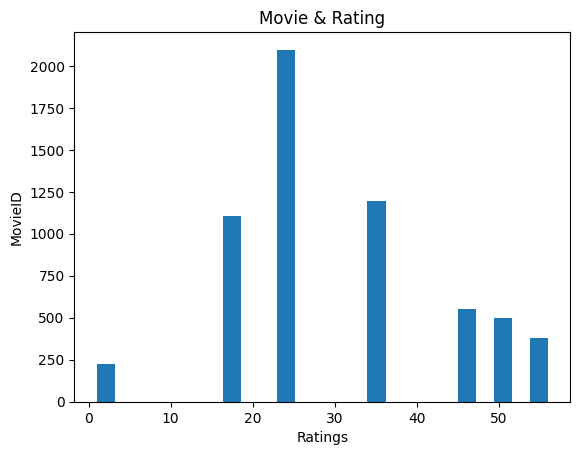

In [ ]:
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.xlabel('Ratings')
plt.ylabel('MovieID')

Text(0, 0.5, 'Age')

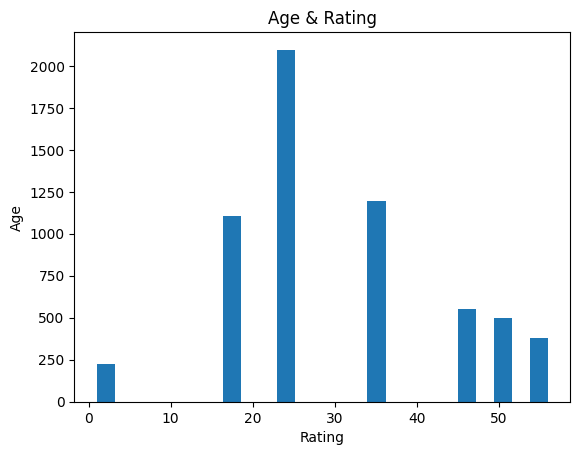

In [ ]:
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.xlabel('Rating')
plt.ylabel('Age')

In [ ]:
logreg = LogisticRegression()
logreg.fit(train,train_labels)
Y_pred = logreg.predict(test)
log = round(logreg.score(train, train_labels) *100,2)
log

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34.11